In [15]:
import  pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('spam.csv',encoding ='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Data Cleaning:*

In [17]:
#dropping unwanted columns and renaming required columns
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.rename(columns= {'v1':'target','v2':'text'}, inplace=True)

In [18]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#Encoding spam messages as 1 and ham messages as 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
#checking for duplicate elements
df.duplicated().sum()

403

In [25]:
#Removing duplicate elements
df = df.drop_duplicates(keep= 'first')

In [28]:
df.shape

(5169, 2)

*Exploratory Data Analysis:*

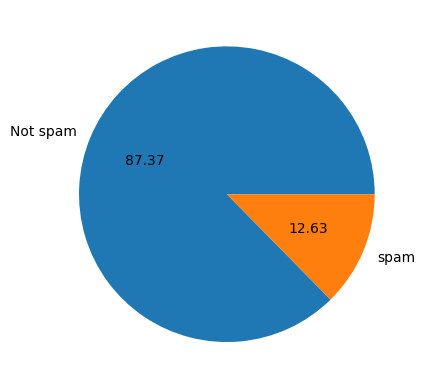

In [29]:
#Pie chart representation
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['Not spam','spam'],autopct="%0.2f")
plt.show()

In [30]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
import seaborn as sns

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

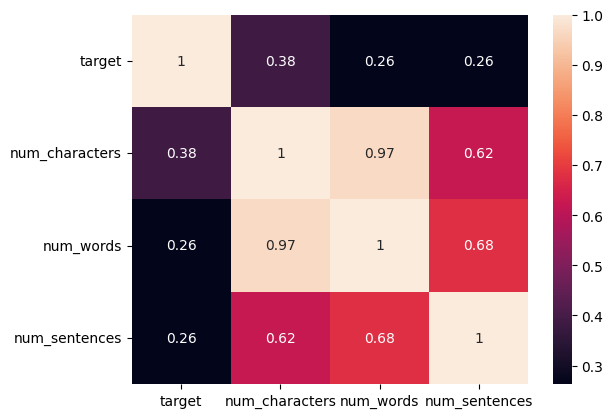

In [36]:
#Heatmap
sns.heatmap(df.corr(), annot=True)

*Data Pre-processing:*

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
def cleaning(text):
  #lower case
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  #removing special characters
  q = [i for i in text if i.isalnum()]
  text = q
  #removing stopwords
  q = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
  text = q
  #stemming
  q = [ps.stem(i) for i in text]
  return " ".join(q)

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
df['cleaned_text'] = df['text'].apply(cleaning)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


*Model Building:*

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [51]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()

In [53]:
y = df['target'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [59]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8694390715667312
0.5068493150684932


In [60]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
1.0


In [62]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
0.991869918699187


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.9758220502901354
0.9829059829059829


In [64]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred_kn = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_kn))
print(precision_score(y_test,y_pred_kn))

0.9758220502901354
0.9829059829059829


**Conclusion:**
By looking at the above results, we can conclude that Multi-nomial Naive Bayes algorithm and Bernoulli Naive Bayes algorithm have higher accuracy and precision than other algorithms. So, these algorithms are suitable in classifying SMS as spam or not.